In [3]:
import pandas as pd
import ast
import matplotlib.pyplot as plt 
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)



c:\Users\welcome\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df_da_us = df[ (df['job_title_short'] == 'Data Analyst') & (df['job_country']=='United States') ].copy()
df_da_us

df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

In [7]:
df_da_us['salary_year_avg'].sample(10)

340549    115000.0
81185     122000.0
69624      85000.0
449938     77500.0
750599     85000.0
746876     67500.0
262937     75000.0
260399     65000.0
364933    102500.0
147605    115000.0
Name: salary_year_avg, dtype: float64

<Axes: >

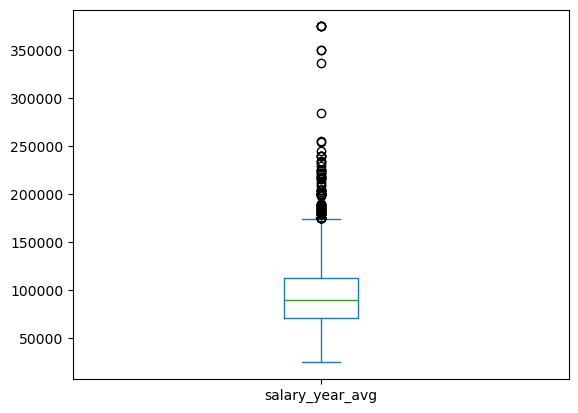

In [9]:
df_da_us['salary_year_avg'].plot(kind= 'box')

{'whiskers': [<matplotlib.lines.Line2D at 0x12e7d8531d0>,
 'caps': [<matplotlib.lines.Line2D at 0x12e7d864490>,
 'boxes': [<matplotlib.lines.Line2D at 0x12e7d852910>],
 'medians': [<matplotlib.lines.Line2D at 0x12e7d865790>],
 'fliers': [<matplotlib.lines.Line2D at 0x12e7d8660d0>],
 'means': []}

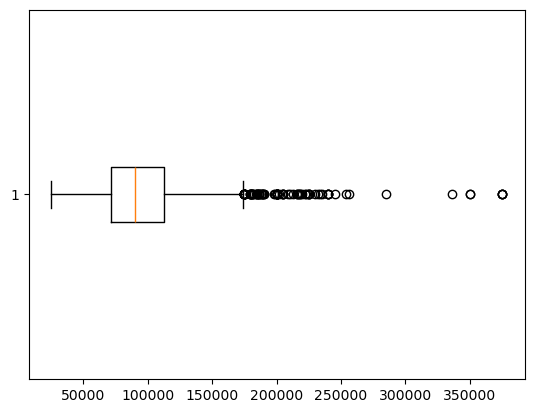

In [11]:
plt.boxplot(df_da_us['salary_year_avg'], vert = False)

In [14]:
job_titles = ['Data Analyst' , 'Data Engineer' , 'Data Scientist']

df_us = df[ (df['job_title_short'].isin(job_titles) ) & (df['job_country']=='United States' )].copy()


In [32]:
df_us =df_us.dropna(subset=['salary_year_avg'])
df_us['salary_year_avg']

job_list = [ df_us[df_us['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

C:\Users\welcome\AppData\Local\Temp\ipykernel_24024\2655902008.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list , labels=job_titles , vert=False)


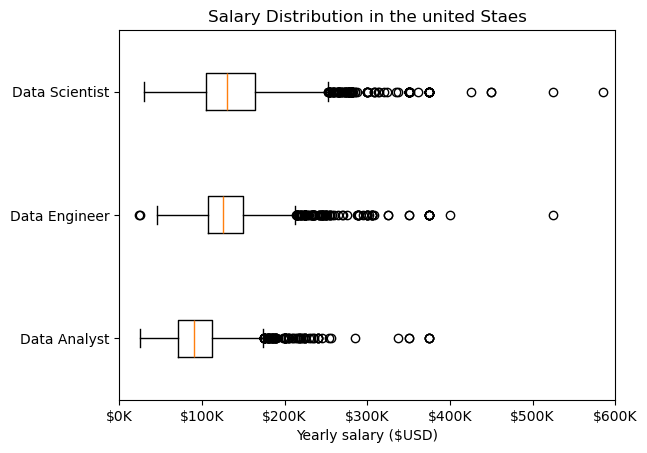

In [41]:
plt.boxplot(job_list , labels=job_titles , vert=False)
plt.title("Salary Distribution in the united Staes")
plt.xlabel('Yearly salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()